# 0. Imports

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as ms
from sklearn import metrics as mt


# 1.0 Load Dataset

In [2]:
# Gerando um conjunto de dados de classificação aleatório
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

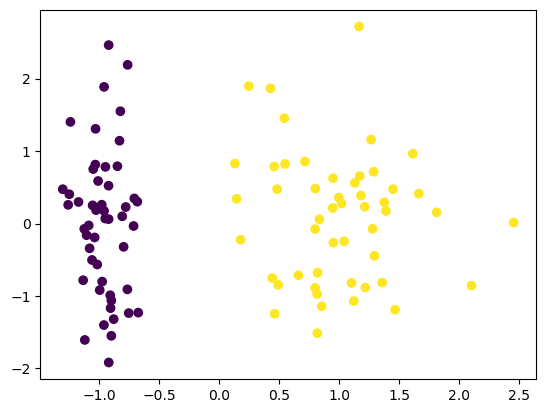

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

# 2.0 Model Training

In [4]:
# Instanciando o modelo de Regressão Logística
model = LogisticRegression()

# Treinando o modelo de Regressão Logística
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# predict
yhat_test = model.predict( X_test )
f1 = mt.f1_score( y_test, yhat_test )

In [6]:
## Calculando a acurácia do modelo nos dados de teste
print('F1-Score: {:.2f}'.format( f1 ) )

F1-Score: 1.00


In [9]:
# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T

In [10]:
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

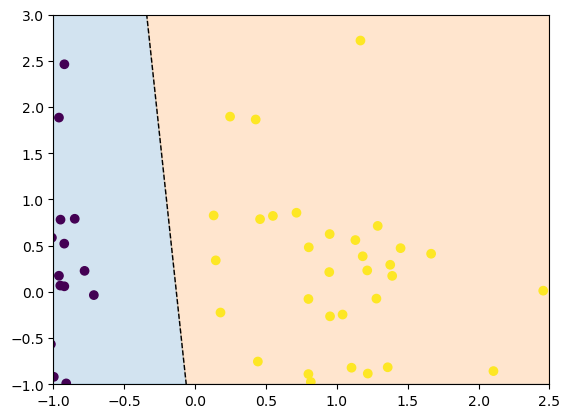

In [11]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2.5
ymin, ymax = -1, 3.0
xd = np.array([xmin, xmax])
yd = m*xd + c


plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter( X_train[:,0], X_train[:,1], c=y_train )
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()


In [12]:
# desenhar um grid
xx, yy = np.mgrid[-1:2.5:.01, -1:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

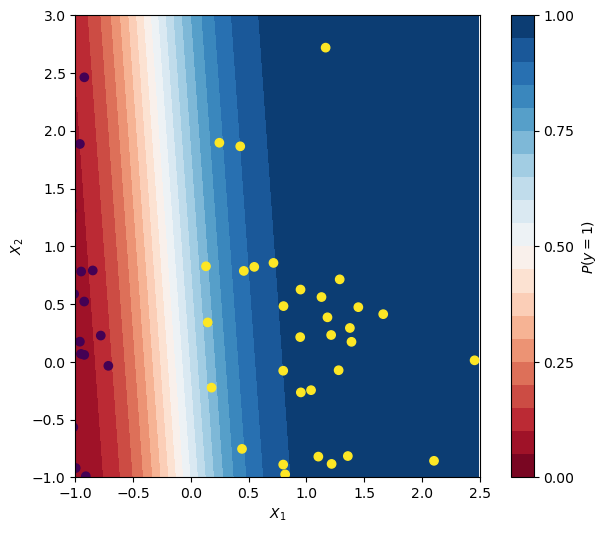

In [23]:
# calcular as probabilidades
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Desenhar os contornos
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 20, cmap="RdBu", vmin=0, vmax=1)

# Barra de probabilidade
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter( X_train[:,0], X_train[:,1], c=y_train )
ax.set(aspect="equal",
xlim=(-1, 2.5), ylim=(-1, 3),
xlabel="$X_1$", ylabel="$X_2$");